Hello, the flow of the work for this paper will be as follows:
1. read the data
2. scale the data
3. visualise the data
4. split the data
5. get feature importance (permutation)
6. visualize the best N imported features
7. try from (1, 5, 10, 50) features, where the features are equally spaced
8. the split should be (70, 30)
9. try up to 6 different classification models (RF, XGB, SVM, LR, KNNs, MD)
10. get the error bars and make comparisons

In [1]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
from matplotlib.pyplot import show # This displays graphs once they have been created
import numpy as np
import matplotlib.pyplot as plt
from source.roc import draw_roc 


### 1. read the data

In [2]:
df = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

In [3]:
df.shape

(503, 2078)

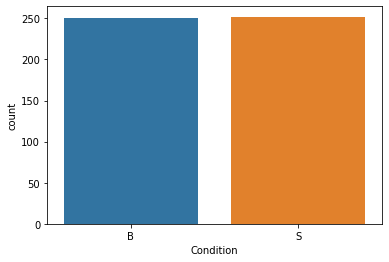

In [4]:
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df)


#### getting x, and y

In [5]:
df_input= df.drop(['Sample', 'Condition', 'Age', 'Source'], axis=1)
df_input
cols = df_input.columns

In [6]:
y = df['Condition']
y = y.map({'S': 1, 'B': 0})

### 2.scale the data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_scaled = scaler.fit_transform(df_input)

df_input_scaled = pd.DataFrame(input_scaled, columns = df_input.columns)
# df_input_scaled['class'] = df['Condition']

df_input_scaled

/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int']. An error will be raised in 1.2.
  warnings.warn(


,11995.490,11991.630,11987.780,11983.920,11980.060,11976.210,11972.350,11968.490,11964.640,11960.780,...,4034.497,4030.640,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.640,3999.783
0,-0.808493,-0.807557,-0.808127,-0.809277,-0.810315,-0.809986,-0.808822,-0.810160,-0.814925,-0.817989,...,-0.408186,-0.390167,-0.395094,-0.416035,-0.416191,-0.393794,-0.376064,-0.394183,-0.438806,-0.461273
1,-1.045204,-1.042834,-1.040064,-1.039891,-1.041951,-1.041888,-1.039677,-1.039588,-1.042774,-1.045571,...,-1.982225,-1.971150,-1.966837,-1.972678,-1.980933,-1.986981,-1.992071,-1.999241,-2.010441,-2.015706
2,-0.933558,-0.930759,-0.930131,-0.930111,-0.930078,-0.929796,-0.930579,-0.933991,-0.938503,-0.941131,...,-0.543787,-0.546740,-0.556853,-0.563482,-0.553554,-0.538869,-0.526329,-0.530286,-0.579681,-0.641481
3,-0.956279,-0.954154,-0.953762,-0.953193,-0.951764,-0.951278,-0.952847,-0.956050,-0.959460,-0.960475,...,-1.022473,-1.018331,-1.003590,-0.988366,-0.989729,-1.006131,-1.027455,-1.034726,-1.020874,-0.996992
4,-1.071554,-1.068693,-1.068226,-1.068877,-1.070526,-1.072038,-1.072885,-1.074952,-1.078072,-1.079284,...,-1.637289,-1.630079,-1.636046,-1.644734,-1.633950,-1.608915,-1.587258,-1.577930,-1.585577,-1.603032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.275430,-0.274320,-0.274200,-0.274479,-0.274608,-0.277242,-0.281107,-0.280976,-0.276278,-0.272611,...,-0.491406,-0.485925,-0.464286,-0.467758,-0.490807,-0.515450,-0.524820,-0.519023,-0.512824,-0.488398
499,-0.298707,-0.295062,-0.294296,-0.294798,-0.296765,-0.301067,-0.302066,-0.298652,-0.296644,-0.297677,...,-1.157046,-1.173071,-1.175726,-1.162370,-1.142283,-1.133218,-1.141321,-1.142113,-1.121310,-1.100813
500,-0.514468,-0.516540,-0.518424,-0.519333,-0.522529,-0.528154,-0.530454,-0.526756,-0.521762,-0.520717,...,-2.076827,-2.073034,-2.058804,-2.051791,-2.053137,-2.047367,-2.043846,-2.051221,-2.057879,-2.057166
501,0.014295,0.014717,0.016864,0.017340,0.015010,0.011359,0.009173,0.008830,0.009937,0.013005,...,1.524477,1.566631,1.663975,1.720487,1.749993,1.765076,1.669538,1.535575,1.491738,1.417050


### 4. split the data

In [8]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_scaled, y, test_size = 0.4, random_state=3, stratify=y) # train and valid sets

In [9]:
print(Xtrain.shape)
print(Xtest.shape)

(301, 2074)
(202, 2074)


### ML with diffrint features as an input

In [10]:
features_ind = [np.arange(0,len(cols), 691),
                   np.arange(0,len(cols), 414), 
                   np.arange(0,len(cols), 207), 
                   np.arange(0,len(cols), 103), 
                   np.arange(0,len(cols), 41)] # define the number features. 
# number_features = [3, 5] # define the number features

#### define the hyper parameters

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from numpy import random as np_random

In [12]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr = LogisticRegression()
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

##############################
C_range = np.logspace(-1, 10, 20) # define a set of values for the parameter C
gamma_range = np.logspace(-9, 3, 20) # define a set of values for the parameter gamma

svm = SVC(kernel="rbf")
svm_par = dict(gamma=gamma_range, C=C_range)

#########################

n_estimators = range(10, 800, 50)
#max_features = ['sqrt', 'log2']

rf = RandomForestClassifier(random_state=1)
rf_par = dict(n_estimators=n_estimators)
#######################
# https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost/notebook
xgb_par = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5, 9],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 8]
        }
xgb = XGBClassifier()
##################################
n_neighbors = range(1, 30, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

knns = KNeighborsClassifier()
knns_par = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
################
anns = MLPClassifier(max_iter=3000, random_state=1, activation = 'relu', solver = 'sgd')
anns_par = {
    'hidden_layer_sizes': [(3,3),(5,5),(8,3)],
#     'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001,0.01,0.1, 0.05, 0.005 , 0.005, 0.00005],
#     'learning_rate': ['constant','adaptive'],
}
################


models = [[lr, 'lr', 30], [svm, 'svm', 10], [rf, 'rf', 30], [xgb, 'xgb', 30], [knns, 'knns', 30], [anns, 'anns', 30]]
par = [lr_par, svm_par, rf_par, xgb_par, knns_par, anns_par]

# models = [[lr, 'lr']]
# par = [lr_par]


In [13]:
### splits
# splits = [0.4]

ml_dicts = {}


#### train and test

In [14]:
from source.ml_acc import get_accuracy_ml

In [ ]:
# for m, par in zip(models, par):
#     # for s in splits:
#     #     X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= s, random_state=1, stratify = y, shuffle = True)
#     key0 = str(m[1])
#     ml_dicts[key0] = {}
#     for f in features_ind:
#         print(f)
#         print(cols[f])
                
#         xtr =  Xtrain[cols[f]]
#         xte =  Xtest[cols[f]]
#         results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

#         key = str(m[1])+","+str(len(f))
#         ml_dicts[key0][key] = {}

#         ml_dicts[key0][key]['tot_acc'] = results[0]
#         ml_dicts[key0][key]['jack_train'] = results[1]
#         ml_dicts[key0][key]['jack_test'] = results[2]

[   0  691 1382 2073]
Index([11995.49, 9330.256, 6665.02, 3999.783], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

[   0  414  828 1242 1656 2070]
Index([11995.49, 10398.67, 8801.837, 7205.009, 5608.182, 4011.354], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

[   0  207  414  621  828 1035 1242 1449 1656 1863 2070]
Index([11995.49, 11197.08, 10398.67, 9600.251, 8801.837, 8003.423, 7205.009,
       6406.596, 5608.182, 4809.768, 4011.354],
      dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

[   0  103  206  309  412  515  618  721  824  927 1030 1133 1236 1339
 1442 1545 1648 1751 1854 1957 2060]
Index([11995.49, 11598.21, 11200.94, 10803.66, 10406.38,  10009.1, 9611.822,
       9214.544, 8817.266, 8419.987, 8022.708,  7625.43, 7228.152, 6830.874,
       6433.595, 6036.317, 5639.039,  5241.76, 4844.482, 4447.204, 4049.925],
      dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

[   0   41   82  123  164  205  246  287  328  369  410  451  492  533
  574  615  656  697  738  779  820  861  902  943  984 1025 1066 1107
 1148 1189 1230 1271 1312 1353 1394 1435 1476 1517 1558 1599 1640 1681
 1722 1763 1804 1845 1886 1927 1968 2009 2050]
Index([11995.49, 11837.35, 11679.21, 11521.07, 11362.93, 11204.79, 11046.65,
       10888.51, 10730.37, 10572.23, 10414.09, 10255.95, 10097.81, 9939.673,
       9781.533, 9623.394, 9465.253, 9307.113, 9148.974, 8990.834, 8832.693,
       8674.554, 8516.414, 8358.273, 8200.134, 8041.994, 7883.854, 7725.714,
       7567.574, 7409.434, 7251.294, 7093.154, 6935.015, 6776.875, 6618.735,
       6460.595, 6302.455, 6144.315, 5986.175, 5828.035, 5669.895, 5511.755,
       5353.615, 5195.475, 5037.335, 4879.195, 4721.056, 4562.916, 4404.776,
       4246.636, 4088.496],
      dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 14 is sma

[   0  691 1382 2073]
Index([11995.49, 9330.256, 6665.02, 3999.783], dtype='object')
[   0  414  828 1242 1656 2070]
Index([11995.49, 10398.67, 8801.837, 7205.009, 5608.182, 4011.354], dtype='object')
[   0  207  414  621  828 1035 1242 1449 1656 1863 2070]
Index([11995.49, 11197.08, 10398.67, 9600.251, 8801.837, 8003.423, 7205.009,
       6406.596, 5608.182, 4809.768, 4011.354],
      dtype='object')
[   0  103  206  309  412  515  618  721  824  927 1030 1133 1236 1339
 1442 1545 1648 1751 1854 1957 2060]
Index([11995.49, 11598.21, 11200.94, 10803.66, 10406.38,  10009.1, 9611.822,
       9214.544, 8817.266, 8419.987, 8022.708,  7625.43, 7228.152, 6830.874,
       6433.595, 6036.317, 5639.039,  5241.76, 4844.482, 4447.204, 4049.925],
      dtype='object')
[   0   41   82  123  164  205  246  287  328  369  410  451  492  533
  574  615  656  697  738  779  820  861  902  943  984 1025 1066 1107
 1148 1189 1230 1271 1312 1353 1394 1435 1476 1517 1558 1599 1640 1681
 1722 1763 1804 1845

/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is sma

[   0  414  828 1242 1656 2070]
Index([11995.49, 10398.67, 8801.837, 7205.009, 5608.182, 4011.354], dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is sma

[   0  207  414  621  828 1035 1242 1449 1656 1863 2070]
Index([11995.49, 11197.08, 10398.67, 9600.251, 8801.837, 8003.423, 7205.009,
       6406.596, 5608.182, 4809.768, 4011.354],
      dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is sma

[   0  103  206  309  412  515  618  721  824  927 1030 1133 1236 1339
 1442 1545 1648 1751 1854 1957 2060]
Index([11995.49, 11598.21, 11200.94, 10803.66, 10406.38,  10009.1, 9611.822,
       9214.544, 8817.266, 8419.987, 8022.708,  7625.43, 7228.152, 6830.874,
       6433.595, 6036.317, 5639.039,  5241.76, 4844.482, 4447.204, 4049.925],
      dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is sma

[   0   41   82  123  164  205  246  287  328  369  410  451  492  533
  574  615  656  697  738  779  820  861  902  943  984 1025 1066 1107
 1148 1189 1230 1271 1312 1353 1394 1435 1476 1517 1558 1599 1640 1681
 1722 1763 1804 1845 1886 1927 1968 2009 2050]
Index([11995.49, 11837.35, 11679.21, 11521.07, 11362.93, 11204.79, 11046.65,
       10888.51, 10730.37, 10572.23, 10414.09, 10255.95, 10097.81, 9939.673,
       9781.533, 9623.394, 9465.253, 9307.113, 9148.974, 8990.834, 8832.693,
       8674.554, 8516.414, 8358.273, 8200.134, 8041.994, 7883.854, 7725.714,
       7567.574, 7409.434, 7251.294, 7093.154, 6935.015, 6776.875, 6618.735,
       6460.595, 6302.455, 6144.315, 5986.175, 5828.035, 5669.895, 5511.755,
       5353.615, 5195.475, 5037.335, 4879.195, 4721.056, 4562.916, 4404.776,
       4246.636, 4088.496],
      dtype='object')


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is sma

[   0  691 1382 2073]
Index([11995.49, 9330.256, 6665.02, 3999.783], dtype='object')
[   0  414  828 1242 1656 2070]
Index([11995.49, 10398.67, 8801.837, 7205.009, 5608.182, 4011.354], dtype='object')
[   0  207  414  621  828 1035 1242 1449 1656 1863 2070]
Index([11995.49, 11197.08, 10398.67, 9600.251, 8801.837, 8003.423, 7205.009,
       6406.596, 5608.182, 4809.768, 4011.354],
      dtype='object')
[   0  103  206  309  412  515  618  721  824  927 1030 1133 1236 1339
 1442 1545 1648 1751 1854 1957 2060]
Index([11995.49, 11598.21, 11200.94, 10803.66, 10406.38,  10009.1, 9611.822,
       9214.544, 8817.266, 8419.987, 8022.708,  7625.43, 7228.152, 6830.874,
       6433.595, 6036.317, 5639.039,  5241.76, 4844.482, 4447.204, 4049.925],
      dtype='object')
[   0   41   82  123  164  205  246  287  328  369  410  451  492  533
  574  615  656  697  738  779  820  861  902  943  984 1025 1066 1107
 1148 1189 1230 1271 1312 1353 1394 1435 1476 1517 1558 1599 1640 1681
 1722 1763 1804 1845

In [15]:
# ml_dicts_CT = ml_dicts
# %store ml_dicts_CT
%store -r ml_dicts_CT
ml_dicts = ml_dicts_CT  

### SD with acc

In [16]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file


In [17]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

In [18]:
print(arr_all)

[[['lr,4', 'lr,6', 'lr,11', 'lr,21', 'lr,51'], [0.6545454545454545, 0.7456140350877193, 0.7807017543859649, 0.7894736842105263, 0.8017241379310345], [0.09416070374603908, 0.053987114143873194, 0.0306612864285342, 0.04859809604941292, 0.03704130413959597]], [['svm,4', 'svm,6', 'svm,11', 'svm,21', 'svm,51'], [0.7272727272727273, 0.7798165137614679, 0.7946428571428571, 0.7837837837837838, 0.8], [0.17676050057708148, 0.33488394008651184, 0.03523060218566704, 0.11949851676686886, 0.036208189148576174]], [['rf,4', 'rf,6', 'rf,11', 'rf,21', 'rf,51'], [0.72, 0.7211538461538461, 0.7227722772277227, 0.7272727272727273, 0.7281553398058253], [0.0930115133600909, 0.11075552711347555, 0.10646392260144617, 0.09247851308042869, 0.10651699107841031]], [['xgb,4', 'xgb,6', 'xgb,11', 'xgb,21', 'xgb,51'], [0.7184466019417476, 0.7009345794392523, 0.7142857142857143, 0.7289719626168224, 0.7169811320754716], [0.2004524315487995, 0.11399720335060981, 0.17945453942262984, 0.14206511060011037, 0.1430219441338169

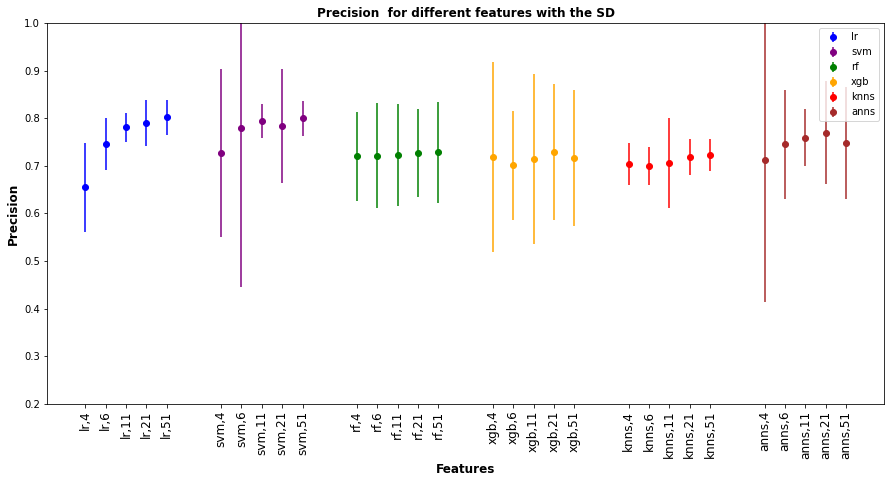

In [39]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1
space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,5)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

### relative performance 

In [20]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    if m_key != "lr":
        for f_key in ml_dicts[m_key].keys():
            value = f_key.split(',')
            acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - ml_dicts['lr']['lr,'+value[1]][ 'tot_acc' ]  )

            sd_train = jack_SD( ml_dicts['lr']['lr,'+value[1]][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
            sd_test = jack_SD(  ml_dicts['lr']['lr,'+value[1]][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]
            
            sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
            sd_diff_arr.append(sd) # append sd_arr to an array
        arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr])  

In [21]:
# we need to fix the feature key, and delete the model

In [22]:
print(arr_diff_all)

[[['svm,4', 'svm,6', 'svm,11', 'svm,21', 'svm,51'], [0.07272727272727275, 0.03420247867374859, 0.013941102756892199, -0.005689900426742556, -0.0017241379310344307], [0.20345510008042483, 0.33764387459143097, 0.031044082275696553, 0.12725928613057058, 0.04112758707129448]], [['rf,4', 'rf,6', 'rf,11', 'rf,21', 'rf,51'], [0.06545454545454543, -0.02446018893387314, -0.05792947715824215, -0.062200956937799035, -0.07356879812520922], [0.13394921206535546, 0.1219016315441239, 0.10855485306499471, 0.10007293726922052, 0.10984383216512889]], [['xgb,4', 'xgb,6', 'xgb,11', 'xgb,21', 'xgb,51'], [0.06390114739629305, -0.04467945564846698, -0.0664160401002506, -0.06050172159370393, -0.08474300585556283], [0.2373408974183106, 0.12362397664207293, 0.17800179285504208, 0.14946353153503136, 0.14414697596420212]], [['knns,4', 'knns,6', 'knns,11', 'knns,21', 'knns,51'], [0.04842484248424839, -0.04561403508771933, -0.07481940144478838, -0.07046541974771636, -0.07903506230078239], [0.10080244058823391, 0.06

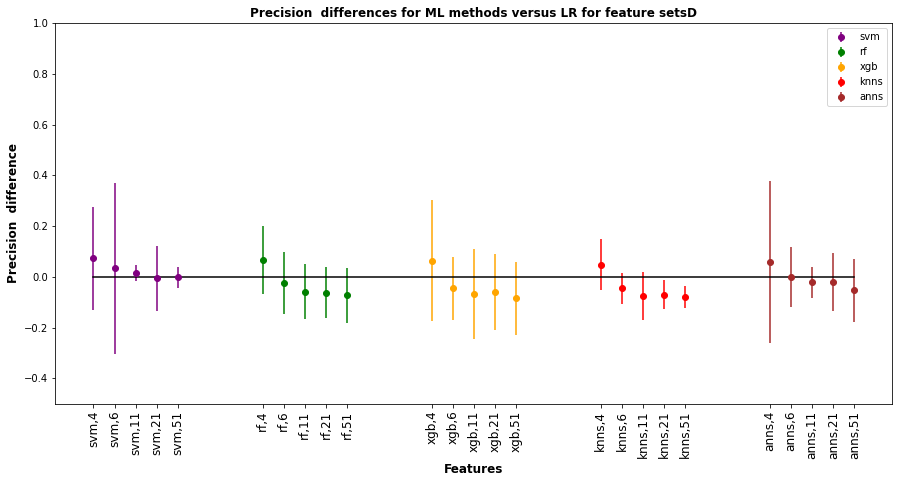

In [38]:
colors = ['purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models[1:], colors):
    a = np.linspace(n*count, n*(1+count)-2,5)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(5*5), color = 'Black')        
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()